# Additional Exercises

#### Prepared for the CBC QuantEcon Workshop (September 2022)

#### Author: John Stachurski

This notebook contains some additional exercises on scientific computing with Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit, prange

## Exercise

Simulate and plot the time series

$$
x_{t+1} = \alpha \, |x_t| + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,T
$$

Use $ T=200 $, $ \alpha = 0.9 $ and $ \{\epsilon_t\} $ as before.

Search online for a function that can be used to compute the absolute value $ |x_t| $.

In [2]:
# Put your code here

In [3]:
for _ in range(12):
    print('solution below')

solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below


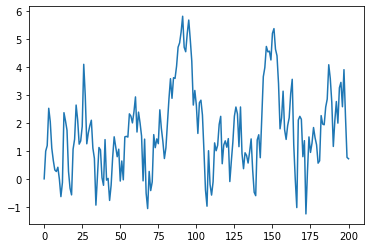

In [4]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    x[t+1] = α * np.abs(x[t]) + np.random.randn()

plt.plot(x)
plt.show()


## Exercise

One important aspect of essentially all programming languages is branching and
conditions.

In Python, conditions are usually implemented with if–else syntax.

Here’s an example, that prints -1 for each negative number in an array and 1
for each nonnegative number

In [5]:
numbers = [-9, 2.3, -11, 0]

for x in numbers:
    if x < 0:
        print(-1)
    else:
        print(1)

-1
1
-1
1


Now, write a new solution to the last exercise that does not use an existing function
to compute the absolute value.

Replace this existing function with an if–else condition.

In [6]:
# Put your code here

In [7]:
for _ in range(12):
    print('solution below')

solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below


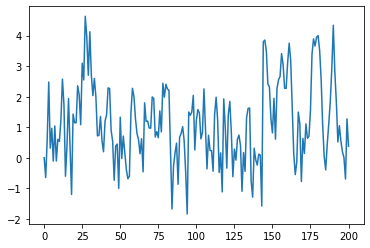

In [8]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    if x[t] < 0:
        abs_x = - x[t]
    else:
        abs_x = x[t]
    x[t+1] = α * abs_x + np.random.randn()

plt.plot(x)
plt.show()

Alternatively,

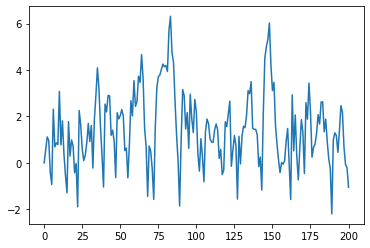

In [9]:
α = 0.9
T = 200
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    abs_x = - x[t] if x[t] < 0 else x[t]
    x[t+1] = α * abs_x + np.random.randn()

plt.plot(x)
plt.show()

## Exercise

Compute an approximation to $ \pi $ using [Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method).

Use new imports.  Your hints are as follows:

- If $ U $ is a bivariate uniform random variable on the unit square $ (0, 1)^2 $, then the probability that $ U $ lies in a subset $ B $ of $ (0,1)^2 $ is equal to the area of $ B $.  
- If $ U_1,\ldots,U_n $ are IID copies of $ U $, then, as $ n $ gets large, the fraction that falls in $ B $, converges to the probability of landing in $ B $.  
- For a circle, $ area = \pi * radius^2 $.  

In [10]:
# Put your code here

In [11]:
for _ in range(12):
    print('solution below')

solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below


Consider the circle of diameter 1 embedded in the unit square.

Let $ A $ be its area and let $ r=1/2 $ be its radius.

If we know $ \pi $ then we can compute $ A $ via
$ A = \pi r^2 $.

But here the point is to compute $ \pi $, which we can do by
$ \pi = A / r^2 $.

Summary: If we can estimate the area of a circle with diameter 1, then dividing
by $ r^2 = (1/2)^2 = 1/4 $ gives an estimate of $ \pi $.

We estimate the area by sampling bivariate uniforms and looking at the
fraction that falls into the circle.

In [12]:
n = 1000000 # sample size for Monte Carlo simulation

count = 0
for i in range(n):

    # drawing random positions on the square
    u, v = np.random.uniform(0, 1), np.random.uniform(0, 1)

    # check whether the point falls within the boundary
    # of the unit circle centred at (0.5,0.5)
    d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)

    # if it falls within the inscribed circle, 
    # add it to the count
    if d < 0.5:
        count += 1

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

3.140048


## Exercise

Accelerate the code from the previous exercise using Numba.  Time the difference.

In [13]:
for _ in range(12):
    print('solution below')

solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below


In [14]:
def calculate_pi(n=1_000_000):
    count = 0
    for i in range(n):
        u, v = np.random.uniform(0, 1), np.random.uniform(0, 1)
        d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
        if d < 0.5:
            count += 1

    area_estimate = count / n
    return area_estimate * 4  # dividing by radius**2

In [15]:
%time calculate_pi()

CPU times: user 3.34 s, sys: 0 ns, total: 3.34 s
Wall time: 3.34 s


3.140836

In [16]:
fast_calc_pi = njit(calculate_pi)

In [17]:
%time fast_calc_pi()

CPU times: user 214 ms, sys: 4.04 ms, total: 218 ms
Wall time: 217 ms


3.142124

And again to omit compile time:

In [18]:
%time fast_calc_pi()

CPU times: user 9.55 ms, sys: 0 ns, total: 9.55 ms
Wall time: 9.66 ms


3.1414

## Exercise

Suppose that the volatility of returns on an asset can be in one of two regimes — high or low.

The transition probabilities across states are as follows

![https://python-programming.quantecon.org/_static/lecture_specific/sci_libs/nfs_ex1.png](https://python-programming.quantecon.org/_static/lecture_specific/sci_libs/nfs_ex1.png)

  
For example, let the period length be one day, and suppose the current state is high.

We see from the graph that the state tomorrow will be

- high with probability 0.8  
- low with probability 0.2  


Your task is to simulate a sequence of daily volatility states according to this rule.

Set the length of the sequence to `n = 1_000_000` and start in the high state.

Implement a pure Python version and a Numba version, and compare speeds.

To test your code, evaluate the fraction of time that the chain spends in the low state.

If your code is correct, it should be about 2/3.

Hints:

- Represent the low state as 0 and the high state as 1.  
- If you want to store integers in a NumPy array and then apply JIT compilation, use `x = np.empty(n, dtype=np.int_)`.  

In [19]:
# Put your code here

In [20]:
for _ in range(12):
    print('solution below')

solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below


We let

- 0 represent “low”  
- 1 represent “high”  

In [21]:
p, q = 0.1, 0.2  # Prob of leaving low and high state respectively

Here’s a pure Python version of the function

In [22]:
def compute_series(n):
    x = np.empty(n, dtype=np.int_)
    x[0] = 1  # Start in state 1
    U = np.random.uniform(0, 1, size=n)
    for t in range(1, n):
        current_x = x[t-1]
        if current_x == 0:
            x[t] = U[t] < p
        else:
            x[t] = U[t] > q
    return x

In [23]:
n = 1_000_000

In [24]:
%time x = compute_series(n)

CPU times: user 355 ms, sys: 3.99 ms, total: 359 ms
Wall time: 359 ms


In [25]:
print(np.mean(x == 0))  # Fraction of time x is in state 0

0.666961


Now let's speed it up:

In [26]:
fast_compute_series = njit(compute_series)

Run once to compile:

In [27]:
%time fast_compute_series(n)

CPU times: user 147 ms, sys: 4.06 ms, total: 151 ms
Wall time: 151 ms


array([1, 1, 1, ..., 0, 1, 1])

Now let's check the speed:

In [28]:
%time fast_compute_series(n)

CPU times: user 4.96 ms, sys: 4.04 ms, total: 9 ms
Wall time: 8.96 ms


array([1, 1, 1, ..., 1, 1, 1])